<a href="https://colab.research.google.com/github/bnehirartan/120-Years-of-Olympic-History-Athletes/blob/main/olympics_mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#120 Years of Olympic History: Athletes Data Set Analysis

##Form a Hypothesis

Can we predict the likelihood that an individual athlete will win a medal based on their age, physical attributes, sport, and country's history?

**Problem Statement**

We aim to predict the likelihood that an individual Olympic athlete will win a medal based on:
- Age
- Physical attributes (height, weight)
- Sport type
- Country/team (which indirectly reflects historical strength)
- Year of participation

This project uses supervised machine learning, followed by an optional unsupervised learning step for bonus analysis.


##Choose the Dataset

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
!ls "/content/drive/My Drive/Colab Notebooks/Global AI Hub & Akbank ML Project"


athlete_events.csv


##Data Loading and Preprocessing

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
file_path = "/content/drive/My Drive/Colab Notebooks/Global AI Hub & Akbank ML Project/athlete_events.csv"
data = pd.read_csv(file_path)


###Basic structures of the data



In [149]:
print (data.shape)

(271116, 15)


In [ ]:
data.head() #before the classification

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [176]:
data.head() #after the classification label creation and preprocessing

,Sex,Age,Height,Weight,Team,Year,Sport,Medal_Won,Cluster
0,M,24.0,180.0,80.0,China,1992,Basketball,0,1
1,M,23.0,170.0,60.0,China,2012,Judo,0,2
4,F,21.0,185.0,82.0,Netherlands,1988,Speed Skating,0,0
5,F,21.0,185.0,82.0,Netherlands,1988,Speed Skating,0,0
6,F,25.0,185.0,82.0,Netherlands,1992,Speed Skating,0,0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206165 entries, 0 to 271115
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Sex        206165 non-null  object 
 1   Age        206165 non-null  float64
 2   Height     206165 non-null  float64
 3   Weight     206165 non-null  float64
 4   Team       206165 non-null  object 
 5   Year       206165 non-null  int64  
 6   Sport      206165 non-null  object 
 7   Medal_Won  206165 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 14.2+ MB


In [ ]:
data.isnull().sum()

,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
Year,0
Sport,0
Medal_Won,0


In [ ]:
data.describe()

,Age,Height,Weight,Year,Medal_Won
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.688337,1989.674678,0.146392
std,5.483096,10.546088,14.340338,20.130865,0.353500
min,11.000000,127.000000,25.000000,1896.000000,0.000000
25%,21.000000,168.000000,60.000000,1976.000000,0.000000
50%,24.000000,175.000000,70.000000,1992.000000,0.000000
75%,28.000000,183.000000,79.000000,2006.000000,0.000000
max,71.000000,226.000000,214.000000,2016.000000,1.000000


###Binary label for classification

1 if athlete won a medal

0 otherwise

In [151]:
data['Medal_Won'] = data['Medal'].notna().astype(int)

In [152]:
##keep only the relevant features for the model
data = data[['Sex', 'Age', 'Height', 'Weight', 'Team', 'Year', 'Sport', 'Medal_Won']]
# remove rows with missing Age, Height, Weight.
data = data.dropna(subset=['Age', 'Height', 'Weight'])


In [153]:
print(data['Medal_Won'].value_counts())

Medal_Won
0    175984
1     30181
Name: count, dtype: int64


##EDA (Exploratory Data Analysis)

### Insights from the Data
Before jumping into modeling, I visually explore the data to understand patterns and distributions. These insights may influence feature selection and model expectations.


<ipython-input-97-1dae9f24f6b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


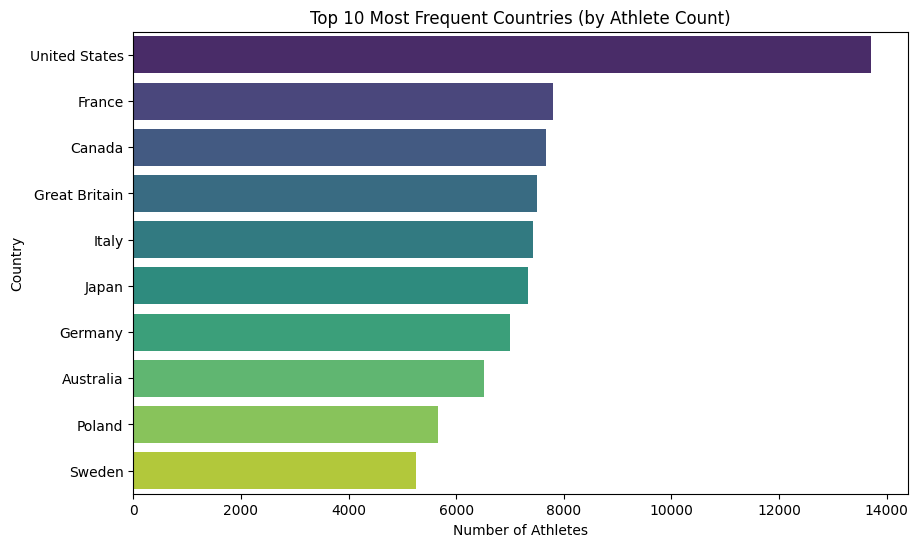

In [ ]:
top_teams = data['Team'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title("Top 10 Most Frequent Countries (by Athlete Count)")
plt.xlabel("Number of Athletes")
plt.ylabel("Country")
plt.show()


<ipython-input-98-95c91d0c8910>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette='plasma')


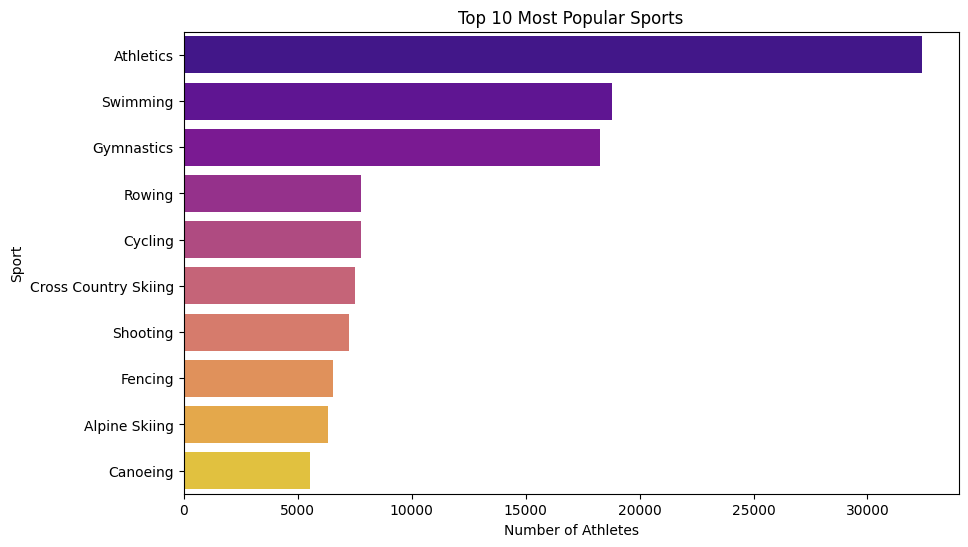

In [ ]:
top_sports = data['Sport'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sports.values, y=top_sports.index, palette='plasma')
plt.title("Top 10 Most Popular Sports")
plt.xlabel("Number of Athletes")
plt.ylabel("Sport")
plt.show()


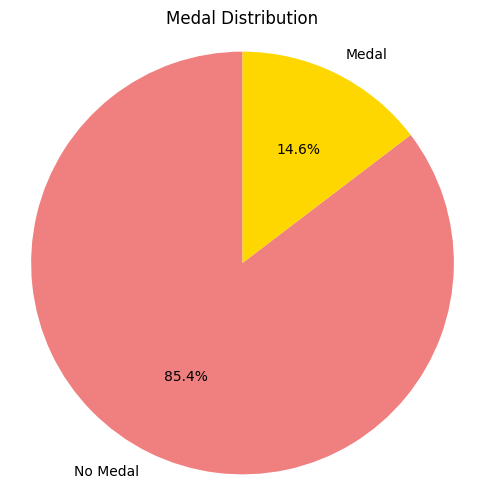

In [ ]:
medal_counts = data['Medal_Won'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(medal_counts, labels=['No Medal', 'Medal'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'gold'])
plt.title("Medal Distribution")
plt.axis('equal')
plt.show()


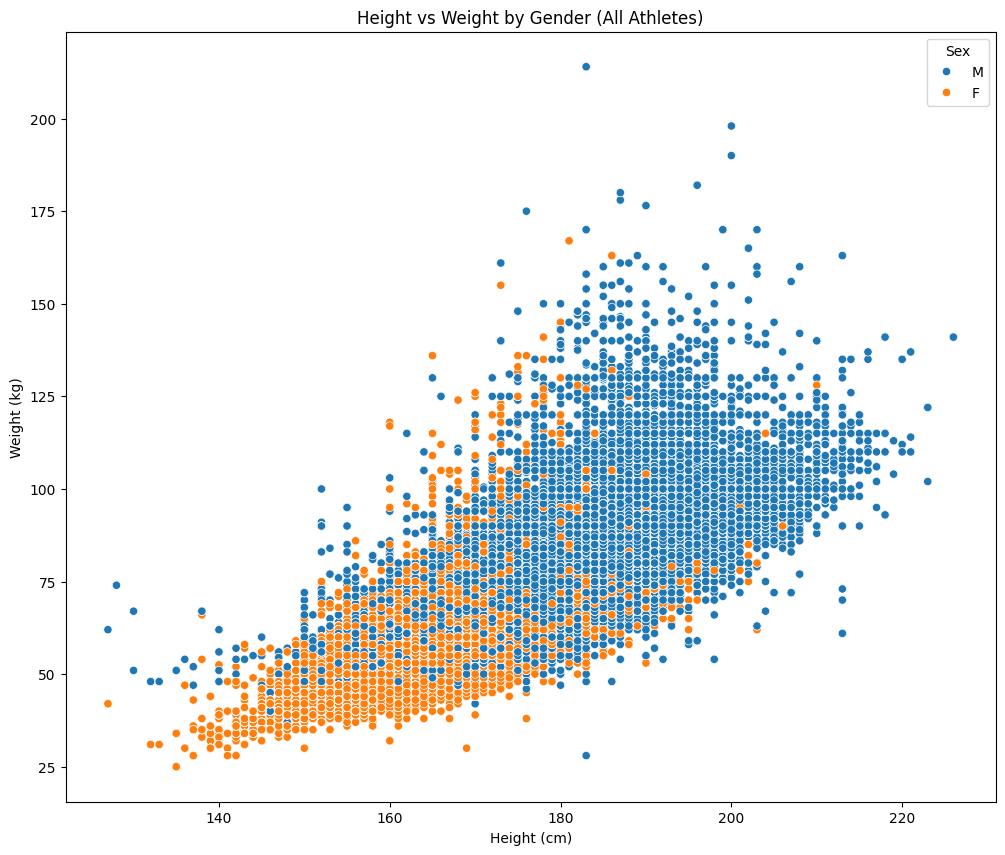

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Height", y="Weight", hue="Sex", data=data)
plt.title("Height vs Weight by Gender (All Athletes)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()


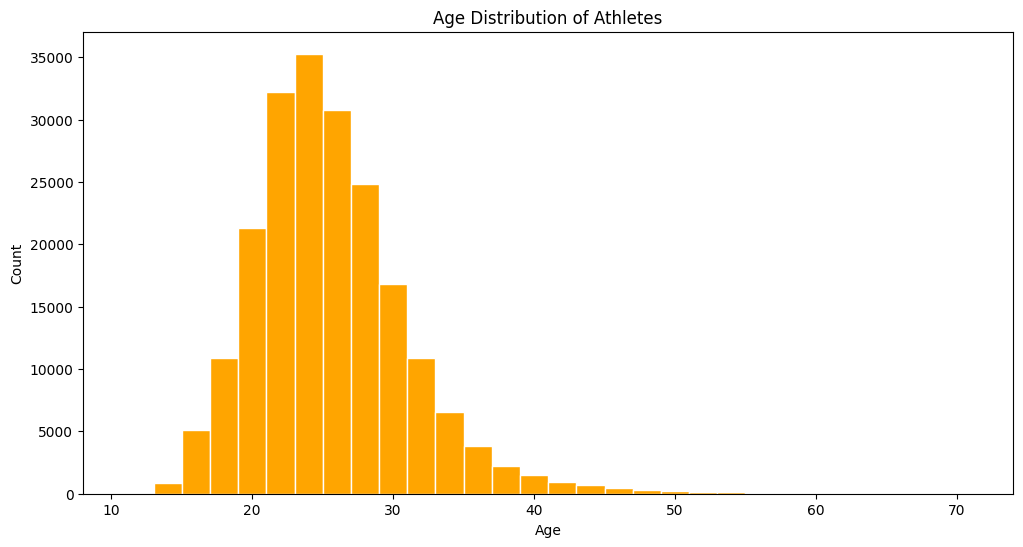

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(data['Age'], bins=30, color='orange', edgecolor='white')
plt.title("Age Distribution of Athletes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


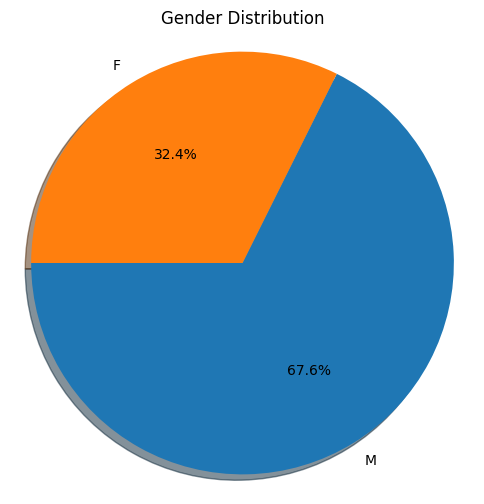

In [ ]:
gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, shadow=True)
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()


<ipython-input-103-8d56495e0af0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Count', data=female_participants, palette='coolwarm')


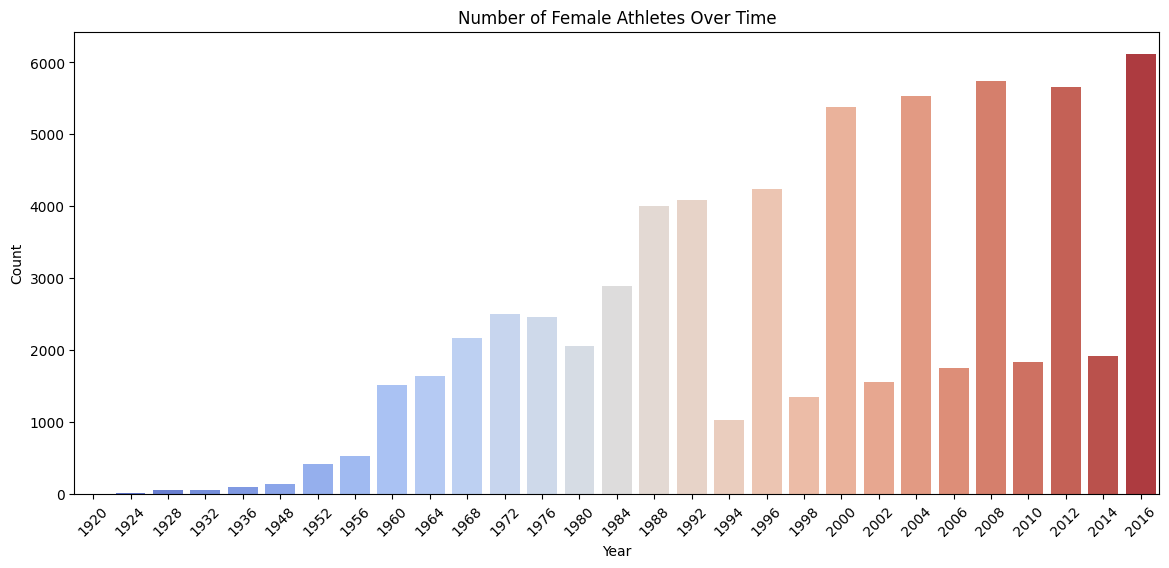

In [ ]:
data['Year'].unique()  # See which years are in your cleaned data
female_participants = data[data['Sex'] == 'F'].groupby('Year').size().reset_index(name='Count')

plt.figure(figsize=(14,6))
sns.barplot(x='Year', y='Count', data=female_participants, palette='coolwarm')
plt.title("Number of Female Athletes Over Time")
plt.xticks(rotation=45)
plt.show()


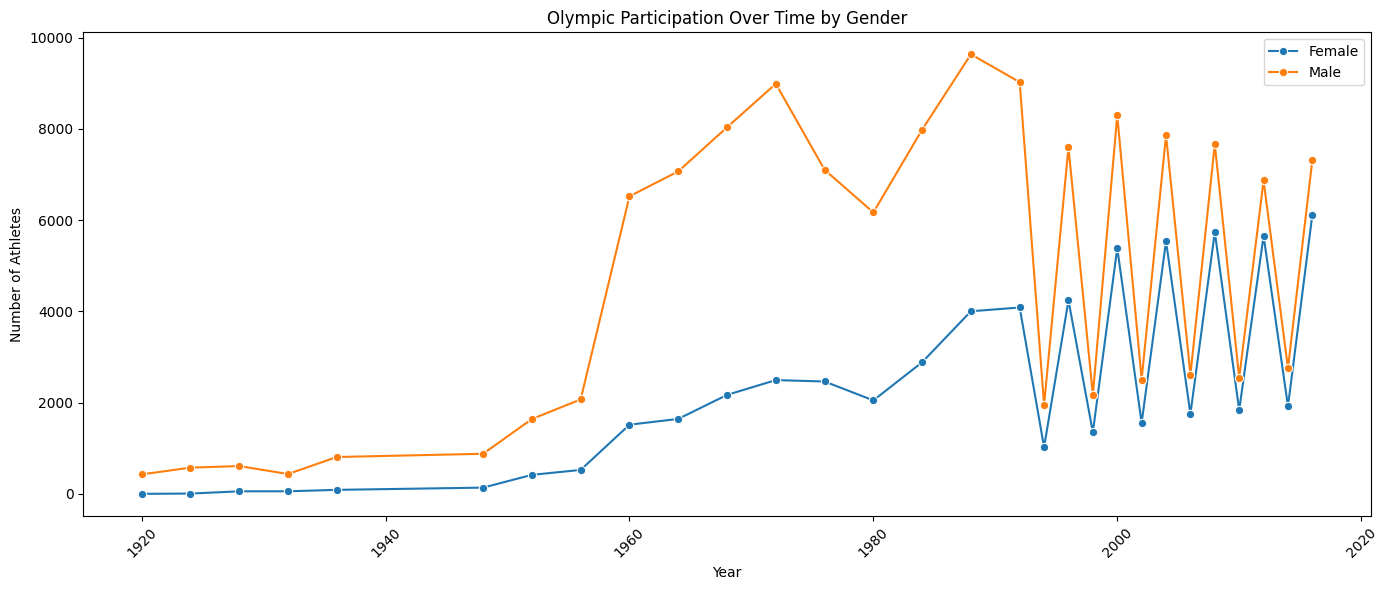

In [ ]:
# Grouping female participants by year
female_participants = data[data['Sex'] == 'F'].groupby('Year').size().reset_index(name='Female_Count')

# Grouping male participants by year
male_participants = data[data['Sex'] == 'M'].groupby('Year').size().reset_index(name='Male_Count')

# Merge into one DataFrame
gender_participation = pd.merge(female_participants, male_participants, on='Year')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Female_Count', data=gender_participation, label='Female', marker='o')
sns.lineplot(x='Year', y='Male_Count', data=gender_participation, label='Male', marker='o')
plt.title('Olympic Participation Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


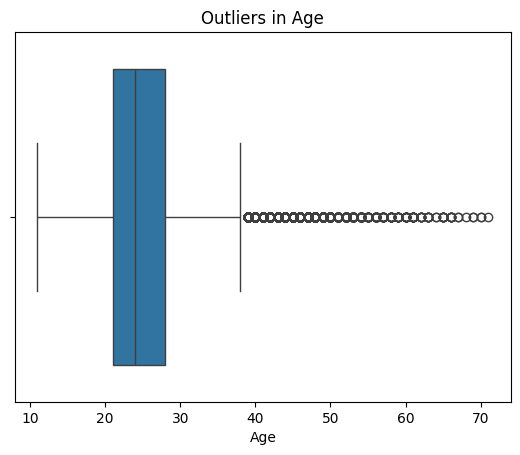

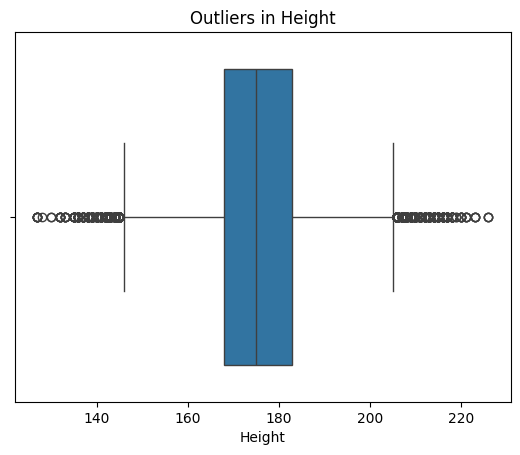

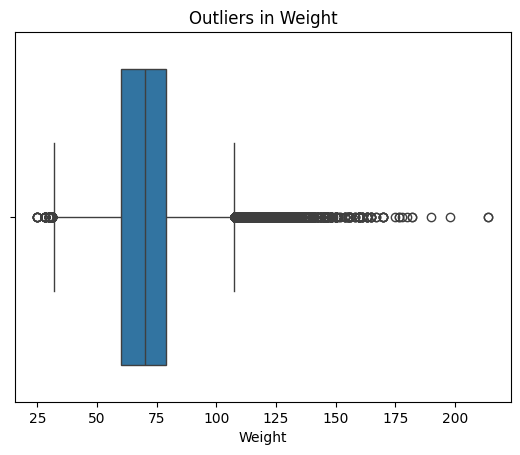

In [ ]:
sns.boxplot(x=data['Age'])
plt.title("Outliers in Age")
plt.show()

sns.boxplot(x=data['Height'])
plt.title("Outliers in Height")
plt.show()

sns.boxplot(x=data['Weight'])
plt.title("Outliers in Weight")
plt.show()


##Label Encoding

Machine learning models require numeric input. We'll convert categorical variables (`Sex`, `Team`, and `Sport`) into integer values using Label Encoding.

In [155]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [156]:
###Seperating features (X) and target (y)
X = data.drop('Medal_Won', axis=1).copy()
y = data['Medal_Won'].copy()

# Encoding all categorical columns with seperate encoders to preserve mapping
encoders = {}

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le


In [157]:
X

,Sex,Age,Height,Weight,Team,Year,Sport
0,1,24.0,180.0,80.0,114,1992,6
1,1,23.0,170.0,60.0,114,2012,26
4,0,21.0,185.0,82.0,374,1988,43
5,0,21.0,185.0,82.0,374,1988,43
6,0,25.0,185.0,82.0,374,1992,43
...,...,...,...,...,...,...,...
271111,1,29.0,179.0,89.0,436,1976,28
271112,1,27.0,176.0,59.0,435,2014,40
271113,1,27.0,176.0,59.0,435,2014,40
271114,1,30.0,185.0,96.0,435,1998,9


In [158]:
print(y)

0         0
1         0
4         0
5         0
6         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal_Won, Length: 206165, dtype: int64


##Model Comparison

I evaluate multiple classification models using **5-fold stratified cross-validation**, which ensures the medal class ratio is preserved in each fold.

Evaluation Metric: **F1-score** is suitable for imbalanced binary classification problems.

In [159]:
#manuel comparison could be used as well.
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}


###Cross-Validation

In [162]:
#splitting the dataset into K folds(subsets) for cross-validation. It ensures that every fold has a similar proportion of medal-winners and non-medal winners.
from sklearn.model_selection import StratifiedKFold
#wrapping f1_score metrics into a scoring function that can be used inside tools like cross_val_score() and/or GridSearchCV.
from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score)

print("Model Evaluation (F1-score - 5-fold cross validation):\n")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_scores = {}

for name, model in models.items():
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
    avg_f1 = np.mean(f1_scores)
    model_scores[name] = avg_f1
    print(f"{name}: {avg_f1:.4f}")

Model Evaluation (F1-score - 5-fold cross validation):

Logistic Regression: 0.0008
Decision Tree: 0.5175
Random Forest: 0.4452
Naive Bayes: 0.0645


###Hyperparameter Tuning and Best Model Selection

After comparing average F1-scores, I select the best-performing model and fine-tune its parameters using **GridSearchCV**.

In [138]:
best_model_name = max(model_scores, key=model_scores.get)
print(f"\n Best Model: {best_model_name}")
best_model = models[best_model_name]



 Best Model: Decision Tree


In [ ]:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
else:
    param_grid = {}  # Naive Bayes typically doesn't use GridSearchCV

if param_grid:
    grid = GridSearchCV(best_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X, y)
    best_model = grid.best_estimator_
    print("\n Best parameters after tuning:")
    print(grid.best_params_)
else:
    best_model.fit(X, y)  # Just fit normally



 Best parameters after tuning:
{'max_depth': None, 'min_samples_split': 10}



*   This output means tree can go as deep as needed, but only if the node has >= 10 samples.


###Final Evaluation

I split the data into train/test sets and evaluate the optimized model on the test set using:
- Classification Report
- Confusion Matrix
- Accuracy, Precision, Recall, F1

In [139]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random_state is added so that every run different splits won't be created.


In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\n Final Model Evaluation:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


 Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     35306
           1       0.58      0.49      0.53      5927

    accuracy                           0.88     41233
   macro avg       0.75      0.72      0.73     41233
weighted avg       0.87      0.88      0.87     41233


 Confusion Matrix:
[[33222  2084]
 [ 3003  2924]]
Accuracy: 0.8766279436373778
Precision: 0.5838658146964856
Recall: 0.49333558292559476
F1 Score: 0.5347965249199818



*  support: The number of true samples for each class in the test set.

Class 0 → support = 35,306
→ There are 35,306 samples that are truly 0 (no medal) in y_test.

Class 1 → support = 5,927
→ There are 5,927 samples that are truly 1 (medal winner) in y_test.

Note: There is a chance that the numbers might slightly change on each run.


###ROC Curve for Final Model

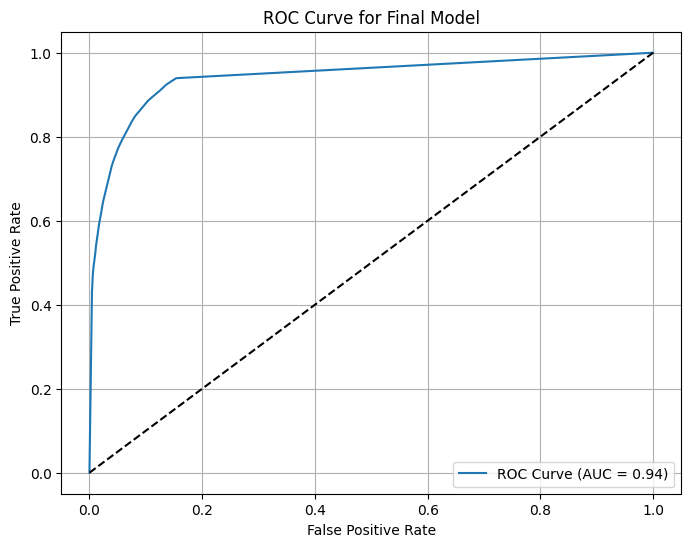

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


###Feature Importance Plot

<ipython-input-120-1eba941502dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


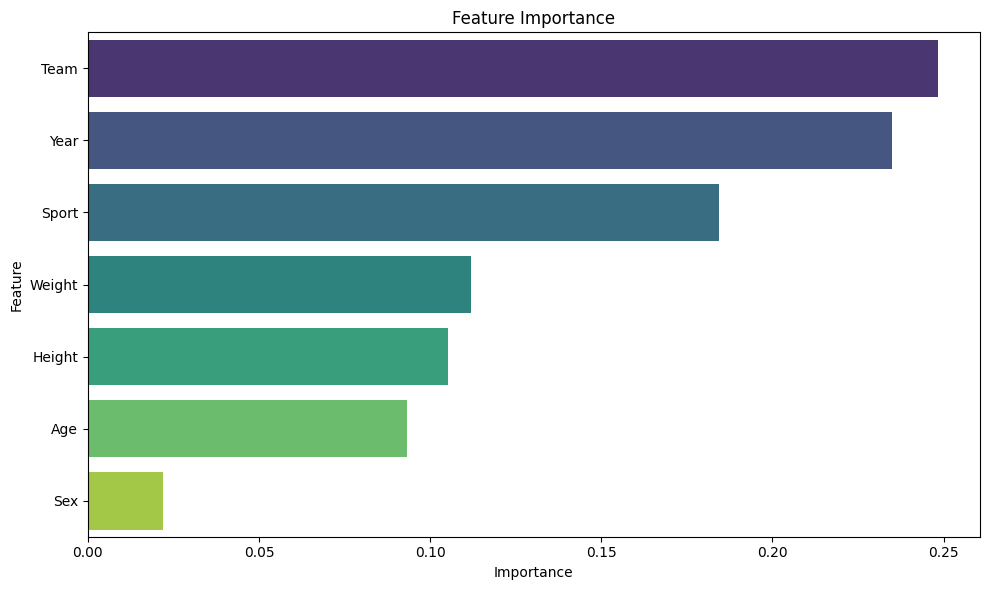

In [120]:
if hasattr(best_model, 'feature_importances_'):
    feature_names = X.columns
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


##Unsupervised Learning on the Dataset

While the main task involved predicting medal outcomes using labeled data, I also explored the dataset from an unsupervised perspective using **clustering**.

Specifically, I asked:

> “Can we find natural groupings among athletes based on their physical attributes, sport, team, and year without using the `Medal_Won` label?”

Used:
- **K-Means Clustering**: to assign athletes into groups.
- **PCA (Principal Component Analysis)**: to visualize clusters in 2D.

###Prepare the features (unlabeled data)

In [163]:
X_unsupervised = data.drop('Medal_Won', axis=1)

# Applying the same label encoders used for supervised learning.
# Ensuring 'encoders' dictionary exists and contains encoders for 'Sex', 'Team', and 'Sport'.
# If the notebook was run in chunks, ensure the cell with LabelEncoding was run first.
for col in ['Sex', 'Team', 'Sport']:
    if col in encoders:
        X_unsupervised[col] = encoders[col].transform(X_unsupervised[col])
    else:
        # Handling the case where encoder for a column is not found (this shouldn't happen if cells run in order)
        print(f"Warning: Encoder not found for column: {col}. Please ensure LabelEncoding cell was executed.")


###Standardize the data

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

###Apply K-Means Clustering

In [165]:
from sklearn.cluster import KMeans

# Trying 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_


###Visualize with PCA

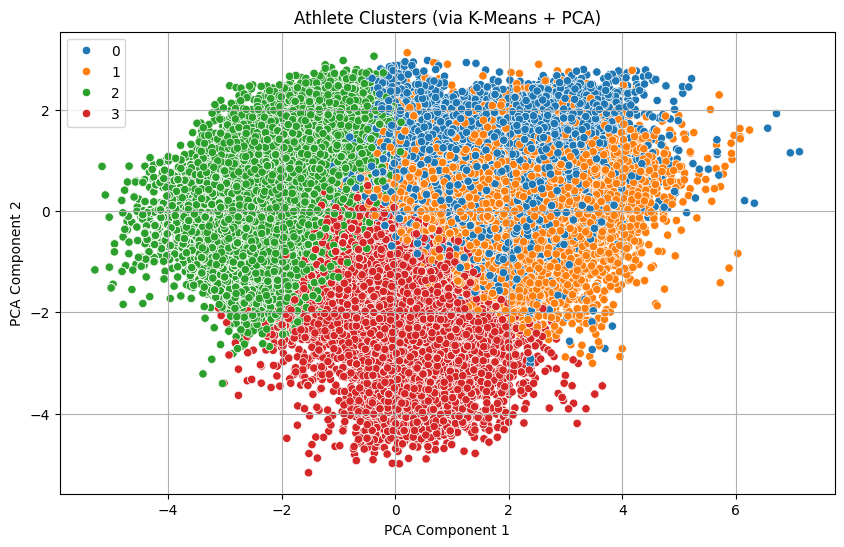

In [167]:
from sklearn.decomposition import PCA

# Reducing the dimension to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Adding PCA results and cluster labels to a new DataFrame
pca_df = pd.DataFrame({
    'PCA1': pca_components[:, 0],
    'PCA2': pca_components[:, 1],
    'Cluster': kmeans.labels_
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("Athlete Clusters (via K-Means + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


After this step when data.head() is run again, two additional columns (PCA1 and PCA2) might appear in the table. If so, this means:


*   Each row (athlete) has now been projected onto two new axes (PCA1, PCA2).
*   These values are now their coordinates in a 2D space



In [ ]:
#to see how Medal_Won is distributed across clusters
pd.crosstab(data['Cluster'], data['Medal_Won'], margins=True)


Medal_Won,0,1,All
Cluster,,,
0,36024,7185,43209
1,41003,7105,48108
2,54510,9333,63843
3,44447,6558,51005
All,175984,30181,206165


This cross-tabulation shows the **distribution of medal winners** across the unsupervised clusters. If some clusters contain a disproportionately high number of medal winners, it suggests that the model has learned meaningful groupings, even without the `Medal_Won` label.

This kind of insight could be useful for:
- Segmenting athlete types
- Identifying potential high-performing profiles
- Recommending tailored training strategies


Now let's see which cluster has the highest % of the medal winners:

In [ ]:
data = {
    0: 7185 / 43209,
    1: 7105 / 48108,
    2: 9333 / 63843,
    3: 6558 / 51005
}

for cluster, rate in data.items():
    print(f"Cluster {cluster}: {rate:.2%}")


Cluster 0: 16.63%
Cluster 1: 14.77%
Cluster 2: 14.62%
Cluster 3: 12.86%


Cluster 0 has the highest proportion of medal winners.

But WHY?

Let's explore what makes Cluster 0 athletes different.


*   What countries, sports, or years are overrepresented?
*   Do they have better physical stats on average?
*   Is their gender distribution different?










###Cluster Profiling

In [168]:
# Let's work on a new copy for analysis
clustered_data = data.copy()

# Applying encoders again (if needed)
for col in ['Sex', 'Team', 'Sport']:
    clustered_data[col] = encoders[col].transform(clustered_data[col])

# Adding cluster labels
clustered_data['Cluster'] = kmeans.labels_


In [169]:
#filtering cluster 0
cluster_0 = clustered_data[clustered_data['Cluster'] == 0]


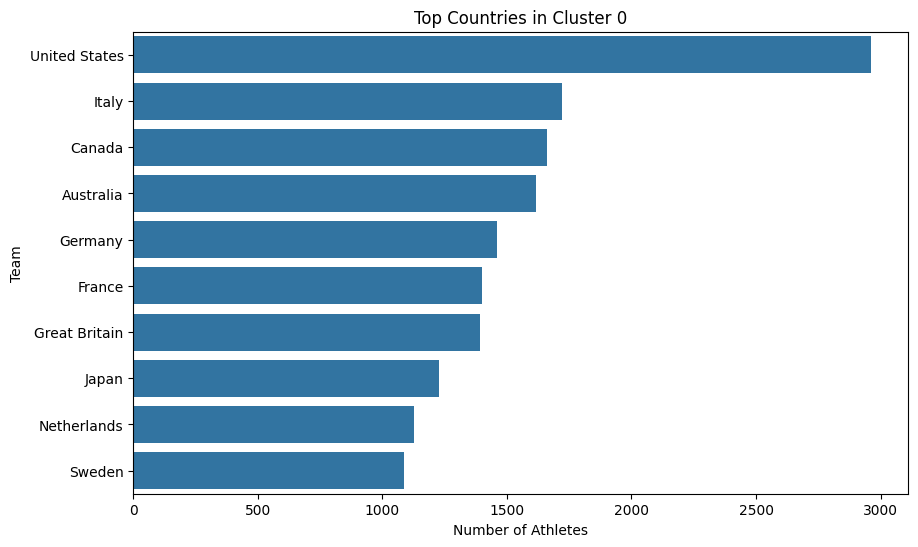

In [170]:
#most common teams
top_teams = cluster_0['Team'].value_counts().head(10)
top_teams_names = [encoders['Team'].inverse_transform([i])[0] for i in top_teams.index]

plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams_names)
plt.title("Top Countries in Cluster 0")
plt.xlabel("Number of Athletes")
plt.ylabel("Team")
plt.show()


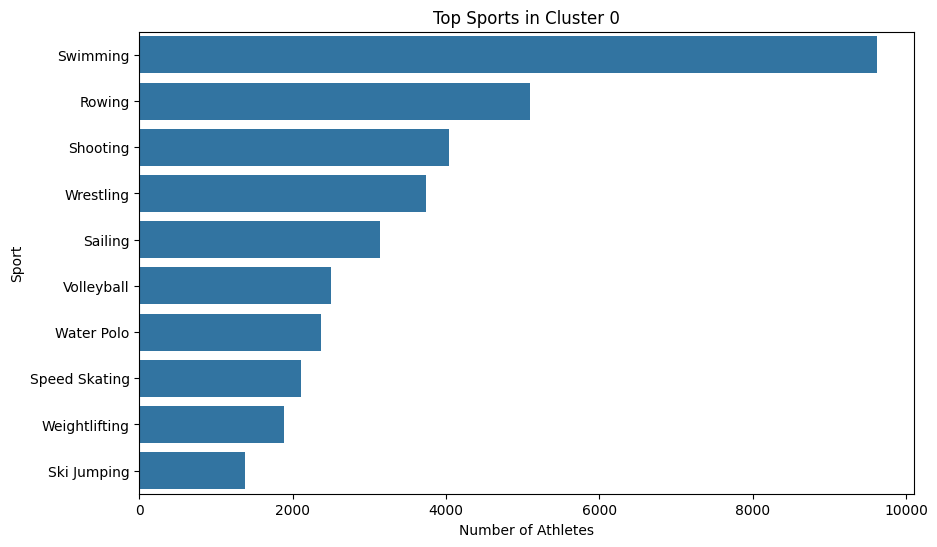

In [171]:
#most common sports
top_sports = cluster_0['Sport'].value_counts().head(10)
top_sports_names = [encoders['Sport'].inverse_transform([i])[0] for i in top_sports.index]

plt.figure(figsize=(10,6))
sns.barplot(x=top_sports.values, y=top_sports_names)
plt.title("Top Sports in Cluster 0")
plt.xlabel("Number of Athletes")
plt.ylabel("Sport")
plt.show()


In [172]:
#average physical states
cluster_0[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,43209.000000,43209.000000,43209.000000
mean,25.488116,183.074452,81.422296
std,5.493495,8.296963,12.566956
min,14.000000,152.000000,48.000000
25%,22.000000,178.000000,73.000000
50%,25.000000,183.000000,80.000000
75%,28.000000,188.000000,88.000000
max,59.000000,219.000000,214.000000


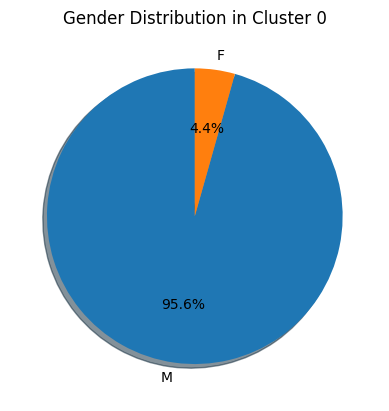

In [173]:
#gender distributions
gender_counts = cluster_0['Sex'].value_counts()
gender_labels = encoders['Sex'].inverse_transform(gender_counts.index)

plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Gender Distribution in Cluster 0")
plt.show()


In [174]:
# comparing average height across clusters
clustered_data.groupby('Cluster')['Height'].mean()


,Height
Cluster,
0,183.074452
1,183.038247
2,166.733080
3,172.429174


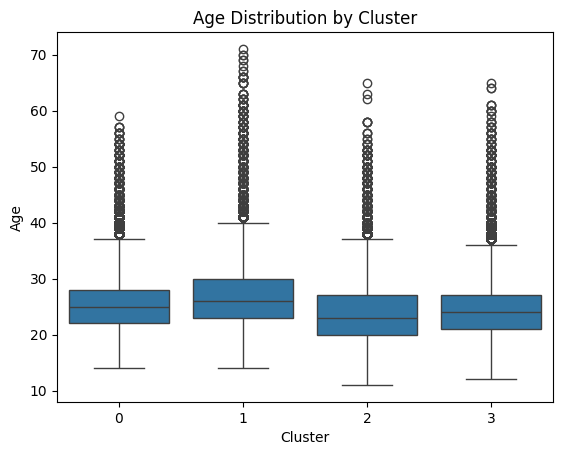

In [175]:
sns.boxplot(x='Cluster', y='Age', data=clustered_data)
plt.title("Age Distribution by Cluster")
plt.show()


### Cluster 0 Profiling Result

Cluster 0 showed the highest medal-winning ratio (16.63%) across all clusters in our unsupervised K-Means analysis. To understand why, I analyzed its most common teams, sports, gender, and physical profile:

---

#### Top Countries Represented in Cluster 0

| 🇺🇸 United States | 🇮🇹 Italy | 🇨🇦 Canada | 🇦🇺 Australia | 🇩🇪 Germany |
|------------------|----------|------------|----------------|-------------|
| Most athletes    | Strong medal history | Competitive in Summer sports | High representation | Consistent performer |

- These countries have long-standing olympic programs and well-funded athletic infrastructures.
- 💡 **Insight**: Cluster 0 athletes often come from **top-performing nations**, which likely contributes to their medal potential.

---

### Top Sports in Cluster 0

- 🏊‍♂️ **Swimming**
- 🚣 **Rowing**
- 🎯 **Shooting**
- 🤼 **Wrestling**
- ⛵ **Sailing**

- These sports include multiple events, increasing the **probability of winning medals**.
- 💡 **Insight**: Cluster 0 is concentrated around **power, precision, and endurance-based sports** that offer high medal opportunities.

---

### Physical Profile

| Attribute | Cluster 0 Avg | Observation |
|-----------|----------------|-------------|
| Height | **183.07 cm** | Tallest among all clusters |
| Weight | **81.42 kg** | Heavier than other clusters |
| Age    | ~**25.5 years** | Slightly older, possibly more experienced |

- 💡 **Insight**: The cluster consists of athletes with **physical builds suited for high-performance** sports like swimming, rowing, and weightlifting.

---

### Gender Distribution

-  **Male**: ~95.6%  
-  **Female**: ~4.4%

- 💡 **Insight**: Cluster 0 is heavily male-dominated, likely due to:
  - Sports in the cluster being historically male-led.
  - Data skewed toward earlier olympic years when female participation was lower.

---

### Summary

> **Cluster 0 = High-performance male athletes from countries with strong olympic presence in medal-dense sport**

This cluster reflects:
- Strong national teams
- Physically elite competitors
- High likelihood of medal success

Together, these traits explain why Cluster 0 outperforms others in medal count even though the model was unsupervised.

---
